In [71]:
# imamo grid... sestkotnik je 4 enote sirok in 2 enoti visok

A2 = vector([3, - 1]) # vektor desno dol
A1 = vector([0, - 2]) # vektor dol

############## Razredi #############

class U:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        self.st_pov = 0
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
                self.b == other.b and
                self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({V(self.a, self.b), V(self.a, self.b - 1), V(self.a + 1, self.b - 1)})
        return s
    
    def premakni(self, c, d):
        return U(self.a + c, self.b + d)
    
    def dodaj_povezavo(self):
        self.st_pov += 1
    
class V:
    def __init__(self, a, b):
        self.a = a # a konstanta ... koliko A1 vektorjev uporabimo
        self.b = b
        self.st_pov = 0        
        
    def __repr__(self):
        a,b = self.podatki()
        return ('{}({}a, {}b)'.format(self.__class__.__name__, a, b))
    
    def __eq__(self, other):
        return (self.a == other.a and 
                self.b == other.b and
                self.__class__.__name__ == other.__class__.__name__)
    
    def __hash__(self): 
#         return hash((self.a, self.b))
        return hash(exp(self.a + exp(self.b)))
    
    def podatki(self):
        return self.a, self.b
    
    def koordinate(self):
        vektor = self.a * A1 + self.b * A2 + vector([2, 0])
        x = vektor[0]
        y = vektor[1]
        return [x, y]
    
    def sosedi(self):
        s = set({U(self.a, self.b), U(self.a - 1, self.b + 1), U(self.a, self.b + 1)})
        return s
        
    def premakni(self, c, d):
        return V(self.a + c, self.b + d)
    
    def dodaj_povezavo(self):
        self.st_pov += 1

############## Funkcije #############

def grid(k, l, m, n):
    # oglisca = ([0, 0], [k, l], [m, n], [k + m, l + n])
    # print U(0,0).koordinate(), U(k, l).koordinate(), U(m, n).koordinate(), U(k + m, l + n).koordinate()

    mina = min(0, k, m, k + m)
    maxa = max(0, k, m, k + m)
    minb = min(0, l, n, l + n)
    maxb = max(0, l, n, l + n)

    mnozica = set()
    for i in range(mina, maxa + 1):
        for j in range(minb, maxb + 1):
            mnozica.add(U(i, j))
    
    return mnozica

# lahko bi poskusili dodati le tiste, ki so "blizje" paralelogramu, ne celege pravokotnika
# def grid1(k, l, m, n):
#     mina = min(0, k, m, k + m)
#     maxa = max(0, k, m, k + m)
#     minb = min(0, l, n, l + n)
#     maxb = max(0, l, n, l + n)

#     mnozica = set()
#     for i in range(mina, maxa + 1):
#         for j in range(minb, maxb + 1):
#             mnozica.add(U(i, j))
    
#     return mnozica

# 3x3 matrika
def determinanta3x3(matrika): 
    a11 = matrika[0][0]
    a12 = matrika[0][1]
    a13 = matrika[0][2]
    
    a21 = matrika[1][0]
    a22 = matrika[1][1]
    a23 = matrika[1][2]
    
    a31 = matrika[2][0]
    a32 = matrika[2][1]
    a33 = matrika[2][2]
        
    det = (
          a11 * (a22 * a33 - a32 * a23) - 
          a12 * (a21 * a33 - a31 * a23) + 
          a13 * (a21 * a32 - a31 * a22)
          )
            
    return det

# gledamo kje je tocka w glede na vektor uv
# ce je tocka levo, je predznak determinante pozitiven,
# ce desno, je predznak negativen,
# ce pa so kolinearne je determinanta 0.
# sprejme tocke U ali V
def zavoj(u, v, w):
    u_x, u_y = u.koordinate()
    v_x, v_y = v.koordinate()
    w_x, w_y = w.koordinate()
    
    matrika = matrix([[1, 1, 1], [u_x, v_x, w_x], [u_y, v_y, w_y]])
    
    return sgn(determinanta3x3(matrika))

def v_paralelogramu(G, u0, u1, u2, u3):
    # G mnozica Ujev, ki jih bomo pregledali,
    # ui zaporedna oglisca v paralelogramu, tako da je notranjost na levi,
    # u0 pa je izhodisce 
    # dopuscamo tocke na daljici u0u1 in na daljici  u3u0
    
    Uji = set()
    Vji = set()
    
    for u in G:   
        v = V(u.a, u.b) # "pripadajoce" vozlisce V

        pogoj_u = (zavoj(u0, u1, u) >= 0 and
                   zavoj(u1, u2, u) >  0 and
                   zavoj(u2, u3, u) >  0 and
                   zavoj(u3, u0, u) >= 0)
        
        pogoj_v = (zavoj(u0, u1, v) >= 0 and
                   zavoj(u1, u2, v) >  0 and
                   zavoj(u2, u3, v) >  0 and
                   zavoj(u3, u0, v) >= 0)
        if pogoj_u:
            Uji.add(u)
        if pogoj_v:
            Vji.add(v)
    
    return Uji, Vji
    
def vozlisca_na_torusu(k, l, m, n):
    G = grid(k, l, m, n)
    
    u_00 = U(0,0)
    u_kl = U(k, l)
    u_klmn = U(k + m, l + n)
    u_mn = U(m, n)

    # ugotovimo orientacijo
    if zavoj(u_kl, u_mn, u_00) == 0:
        Uji, Vji = "Izrojen", "Izrojen" # niso mnozice
    elif zavoj(u_kl, u_mn, u_00) > 0:
        # u_00 lezi levo od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_kl, u_klmn, u_mn)
    elif zavoj(u_kl, u_mn, u_00) < 0:
        # u_00 lezi desno od vektorja u_kl u_mn
        Uji, Vji = v_paralelogramu(G, u_00, u_mn, u_klmn, u_kl)
    
    return Uji, Vji

from collections import defaultdict

def povezave_na_torusu(k, l, m, n):
    Uij, Vij = vozlisca_na_torusu(k, l, m, n)
    if Uij == "Izrojen":
        return Uij # paralelogram je izrojen
    else:
        vozlisca = set(union(Uij, Vij)) # vozlisca znotraj paralelograma (brez stranic)
        pregledane = set()
        povezave = []
        vsi_sosedi = set()
               
        for tocka in vozlisca:
            vsi_sosedi = vsi_sosedi.union(tocka.sosedi())
        
        for tocka in vozlisca:
            print("----Pregledujem tocko {}".format(tocka))
            for sosed in tocka.sosedi():
                print("Pregledujem soseda {}".format(sosed))
                if sosed in vozlisca:
                    povezave.append((tocka, sosed))
                else:
                    for i in [-1, 1]:
                        premaknjen_kl = sosed.premakni(i * k, i * l)
                        if premaknjen_kl in vozlisca:
                            povezave.append((tocka, premaknjen_kl))
                            print("Dodal sem {}. i je {}".format((tocka, premaknjen_kl),i))
                            break
                        elif premaknjen_kl not in vsi_sosedi:
                            for j in [-1, 1]:
                                premaknjen_kl_mn = premaknjen_kl.premakni(j * m, j * n)
                                if premaknjen_kl_mn in vozlisca:
                                    povezave.append((tocka, premaknjen_kl_mn))
                                    print("Dodal sem {}. i je {}, j je {}".format((tocka, premaknjen_kl_mn),i,j))
                                    break
                    for i in [-1, 1]:
                        premaknjen_mn = sosed.premakni(i * m, i * n)
                        if premaknjen_mn in vozlisca:
                            povezave.append((tocka, premaknjen_mn))
                            print("Dodal sem {}. i je {}".format((tocka, premaknjen_mn),i))
                            break
                        elif premaknjen_mn not in vsi_sosedi:
                            for j in [-1, 1]:
                                premaknjen_mn_kl = premaknjen_mn.premakni(j * k, j * l)
                                if premaknjen_mn_kl in vozlisca:
                                    povezave.append((tocka, premaknjen_mn_kl))
                                    print("Dodal sem {}. i je {}, j je {}".format((tocka, premaknjen_mn_kl),i,j))
                                    break
            print("-----------Pregledal sem {} -----------".format(tocka))
                    
        
        return povezave 
    
    

    
def isci_v_seznamu(seznam, tocka):
    for t in seznam:
        if t.a == tocka.a and t.b == tocka.b:
            return t
    else:
        return False
    
def povezave_na_torusu4(k, l, m, n):
    Uij, Vij = vozlisca_na_torusu(k, l, m, n)
    if Uij == "Izrojen":
        return Uij # paralelogram je izrojen
    else:
        vozlisca = set(union(Uij, Vij)) # vozlisca znotraj paralelograma (brez stranic)
        pregledane = set()
        povezave = []
        vsi_sosedi = set()
               
        for tocka in vozlisca:
            vsi_sosedi = vsi_sosedi.union(tocka.sosedi())
        
        for tocka in vozlisca:
            print("----Pregledujem tocko {}".format(tocka))
            for sosed in tocka.sosedi():
                print("Pregledujem soseda {}".format(sosed))
                if sosed in vozlisca:
                    povezave.append((tocka, sosed))
                    tocka.dodaj_povezavo()
                    sosed.dodaj_povezavo()
                else:
                    for i in [-1, 1]:
                        premaknjen_kl = isci_v_seznamu(vozlisca, sosed.premakni(i * k, i * l))
                        if premaknjen_kl:
                            if premaknjen_kl.st_pov < 3 and tocka.st_pov < 3:
                                povezave.append((tocka, premaknjen_kl))
                                tocka.dodaj_povezavo()
                                premaknjen_kl.dodaj_povezavo()
                                print("Dodal sem {}. i je {}".format((tocka, premaknjen_kl),i))
                                break
                        elif premaknjen_kl not in vsi_sosedi:
                            for j in [-1, 1]:
                                premaknjen_kl_mn = isci_v_seznamu(vozlisca, sosed.premakni(j * m + i * k, j * n + i * l))
                                if premaknjen_kl_mn:
                                    if premaknjen_kl.st_pov < 3 and tocka.st_pov < 3:
                                        povezave.append((tocka, premaknjen_kl_mn))
                                        tocka.dodaj_povezavo()
                                        premaknjen_kl_mn.dodaj_povezavo()
                                        print("Dodal sem {}. i je {}, j je {}".format((tocka, premaknjen_kl_mn),i,j))
                                        break
                    for i in [-1, 1]:
                        premaknjen_mn = isci_v_seznamu(vozlisca, sosed.premakni(i * m, i * n))
                        if premaknjen_mn: 
                            if premaknjen_mn.st_pov < 3 and tocka.st_pov < 3:
                                povezave.append((tocka, premaknjen_mn))
                                tocka.dodaj_povezavo()
                                premaknjen_mn.dodaj_povezavo()
                                print("Dodal sem {}. i je {}".format((tocka, premaknjen_mn),i))
                                break
                        elif premaknjen_mn not in vsi_sosedi:
                            for j in [-1, 1]:
                                premaknjen_mn_kl = isci_v_seznamu(vozlisca, sosed.premakni(i * m + j * k, i * n + j * l))
                                if premaknjen_mn_kl:
                                    if premaknjen_mn_kl.st_pov < 3 and tocka.st_pov < 3:
                                        povezave.append((tocka, premaknjen_mn_kl))
                                        tocka.dodaj_povezavo()
                                        premaknjen_mn_kl.dodaj_povezavo()
                                        print("Dodal sem {}. i je {}, j je {}".format((tocka, premaknjen_mn_kl),i,j))
                                        break
            print("-----------Pregledal sem {} -----------".format(tocka))
                    
        
        return povezave 


def nanotorus(k, l, m, n):
    p = povezave_na_torusu(k, l, m, n)
    if p == "Izrojen":
        print("Paralelogram je izrojen!")
    else:
        G = Graph(p, multiedges = True)
        G._pos = {v: v.koordinate() for v in G}
        return G
    
def nanotorus4(k, l, m, n):
    p = povezave_na_torusu4(k, l, m, n)
    if p == "Izrojen":
        print("Paralelogram je izrojen!")
    else:
        G = Graph(p, multiedges = True)
        G._pos = {v: v.koordinate() for v in G}
        return G

----Pregledujem tocko U(0a, 0b)
Pregledujem soseda V(0a, 0b)
Pregledujem soseda V(0a, -1b)
Dodal sem (U(0a, 0b), V(2a, 0b)). i je 1
Pregledujem soseda V(1a, -1b)
Dodal sem (U(0a, 0b), V(2a, 0b)). i je 1, j je -1
-----------Pregledal sem U(0a, 0b) -----------
----Pregledujem tocko V(2a, 0b)
Pregledujem soseda U(1a, 1b)
Dodal sem (V(2a, 0b), U(0a, 0b)). i je -1, j je 1
Pregledujem soseda U(2a, 0b)
Pregledujem soseda U(2a, 1b)
Dodal sem (V(2a, 0b), U(0a, 0b)). i je -1
-----------Pregledal sem V(2a, 0b) -----------


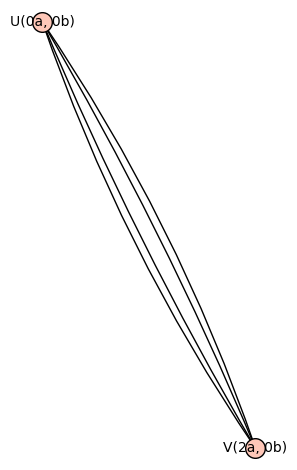

In [2]:
nanotorus(1,0,2,1).plot()

In [29]:
U(0,0).st_pov

0

In [30]:
k = U(0,0)

In [31]:
k.dodaj_povezavo()

In [32]:
k.st_pov

1

In [72]:
nanotorus4(1,0,2,1).plot()

----Pregledujem tocko U(0a, 0b)
Pregledujem soseda V(0a, 0b)
Pregledujem soseda V(0a, -1b)
Dodal sem (U(0a, 0b), V(2a, 0b)). i je 1
Pregledujem soseda V(1a, -1b)


AttributeError: 'bool' object has no attribute 'st_pov'

In [36]:
def ali_atribut_dela():
    for k in grid(1, 0, 2, 1):
        k.dodaj_povezavo()
        if k.st_pov < 1:
            return False
    return True

ali_atribut_dela()

True

In [56]:
for k in grid(1,0,2,1):
    if 

NameError: name 'self' is not defined